<a href="https://colab.research.google.com/github/Bishawa/Covid19_Tweet_Sentiment_Analysis/blob/main/Bishawajeet_Singha_Covid19_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



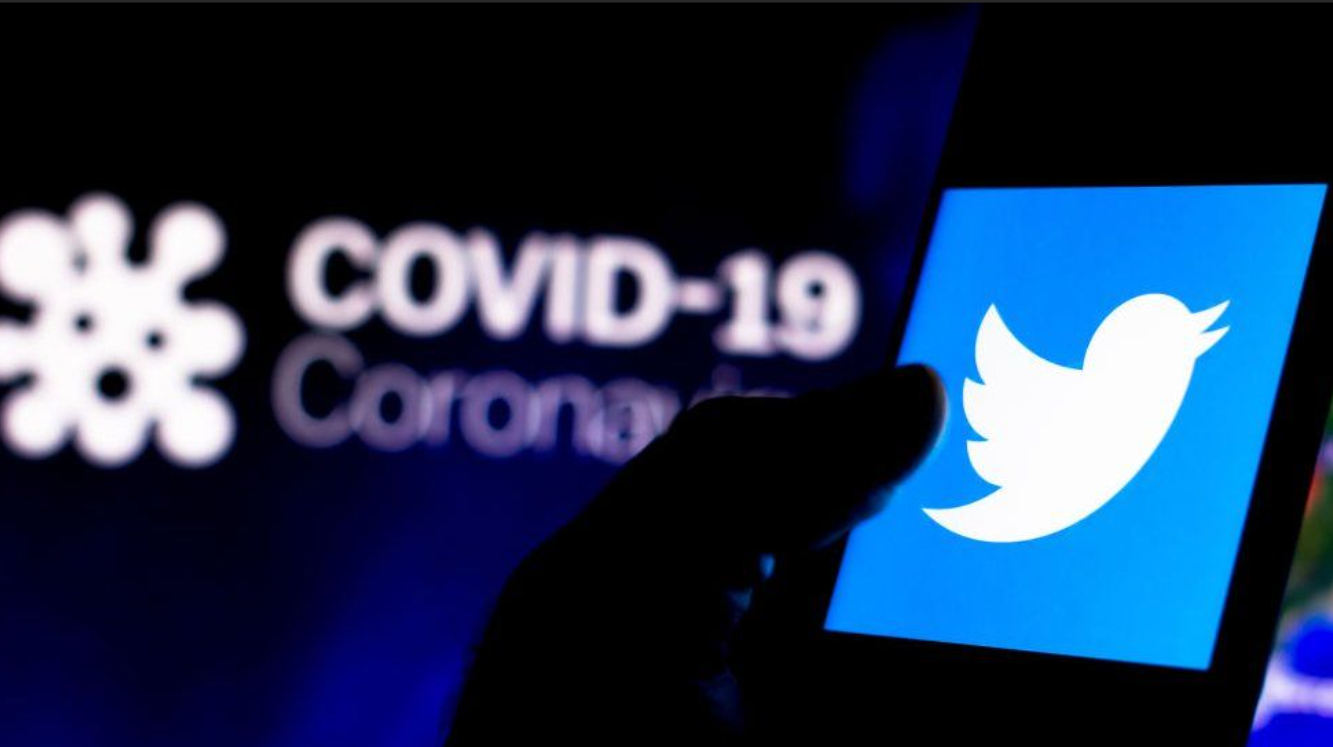

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

In [112]:
#First we are importing all the essential libraries used in our analysis.

## EDA Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import missingno as msno
from datetime import datetime

##Text Preprocessing Libraries
import nltk
from wordcloud import WordCloud

### Dataset Loading

In [113]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 4 ML /Capstone Project - Classification/Coronavirus Tweets.csv', encoding= 'ISO-8859-1', low_memory=False)
##Here we have used encoding = 'ISO-8859-1' to deal with the unicode error

### Dataset First View

In [114]:
# Dataset First Look
data.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

The **head()** function is used to get the first n rows, which is five by default.

### Dataset Rows & Columns count

In [115]:
# Dataset Rows & Columns count
data.shape   #There are 41,157 observations and 6 features in our dataset

(41157, 6)

**Shape()**: The shape property returns a tuple containing the shape of the DataFrame.

### Dataset Information

In [116]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


**info():** The info() method prints information about the DataFrame.

#### There are null values in our location column

#### Duplicate Values

In [117]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### There are no duplicate values in our dataset

#### Missing Values/Null Values

In [118]:
# Missing Values/Null Values Count
data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

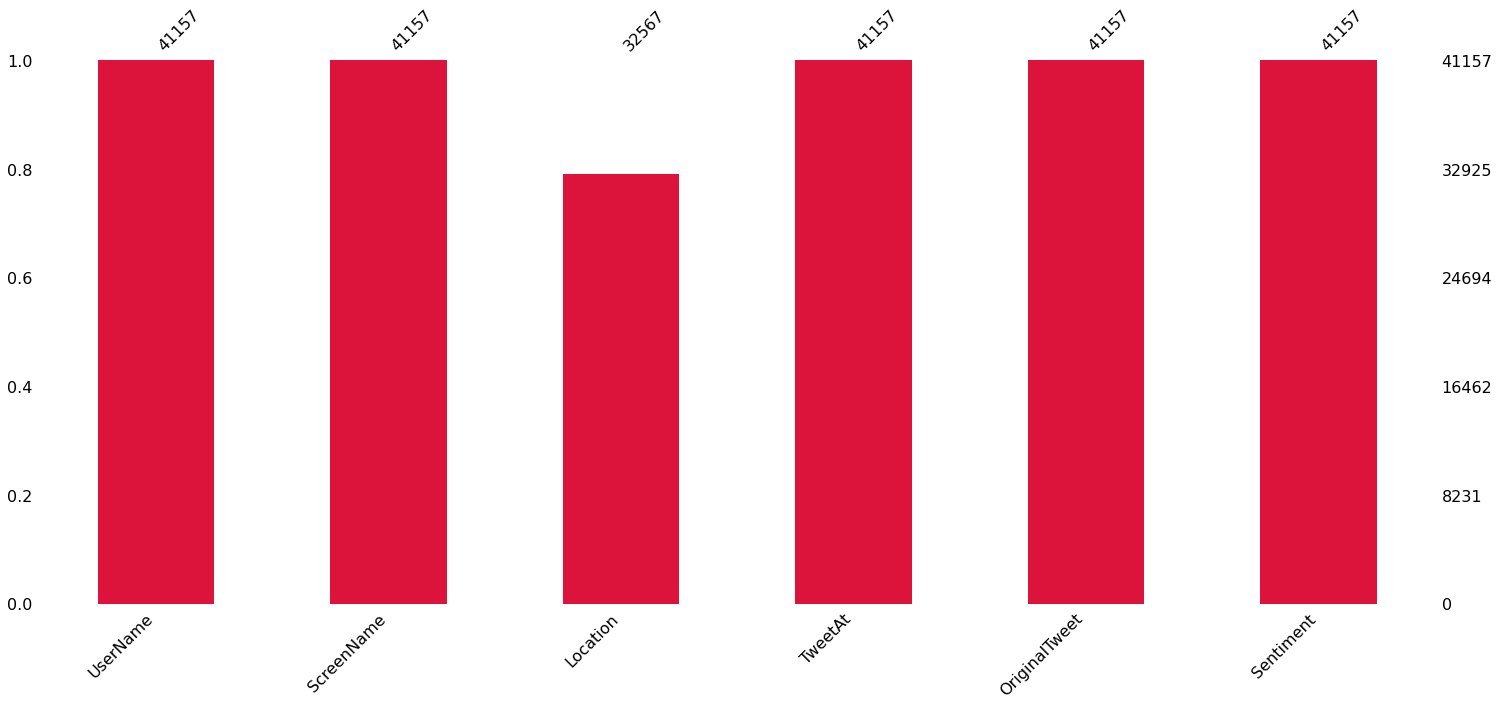

In [119]:
# Visualizing the missing values
msno.bar(data, color='crimson')

### What did you know about your dataset?

#### 1. We can see that there are 41,157 observations and 6 features in our dataset.
#### 2. There are no duplicate values in our dataset.
#### 3. There are many null values in location column in our dataset.
#### 4. This dataset contains the tweets from different users, all tweets are related to COVID19.
#### 5. And Sentiments values are given that describes the sentiment related to a particular tweet, it determines if the tweet is positive, negative, extremely positive, extremely negative or neutral.

## ***2. Understanding Your Variables***

In [120]:
# Dataset Columns
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [121]:
# Dataset Describe
data.describe(include='all')

UserName    ScreenName Location     TweetAt  \
count   41157.000000  41157.000000    32567       41157   
unique           NaN           NaN    12220          30   
top              NaN           NaN   London  20-03-2020   
freq             NaN           NaN      540        3448   
mean    24377.000000  69329.000000      NaN         NaN   
std     11881.146851  11881.146851      NaN         NaN   
min      3799.000000  48751.000000      NaN         NaN   
25%     14088.000000  59040.000000      NaN         NaN   
50%     24377.000000  69329.000000      NaN         NaN   
75%     34666.000000  79618.000000      NaN         NaN   
max     44955.000000  89907.000000      NaN         NaN   

                                            OriginalTweet Sentiment  
count                                               41157     41157  
unique                                              41157         5  
top     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...  Positive  
freq                                                    1     11422  
mean                                                  NaN       NaN  
std                                                   NaN       NaN  
min                                                   NaN       NaN  
25%                                                   NaN       NaN  
50%                                                   NaN       NaN  
75%                                                   NaN       NaN  
max                                                   NaN       NaN

### Variables Description 

#### 1. There are total 6 variables in our dataset.
#### 2. One of the most important features are OriginalTweet and Sentiment.
#### 3. We have quite a good number of null values in the feature Location.
#### 4. There are 2 numerical features in our dataset, which are UserName and ScreenName.
#### 5. Also we have a column named 'TweetAt' that specify the date when the tweet was posted by the user.

### Check Unique Values for each variable.

In [122]:
data['Location'].unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

In [123]:
# Check Unique Values for each variable.
#A for loop is used for iterating over a sequence (that is either a list, a tuple, a dictionary, a set, or a string).
data_columns_list = data.columns.to_list()
for i in data_columns_list:
  print('\033[1m'+'\n\nThe Unique Values in'+'\033[0m','\033[1m'+ i+'\033[0m', 'are:', data[i].unique())



The Unique Values in UserName are: [ 3799  3800  3801 ... 44953 44954 44955]


The Unique Values in ScreenName are: [48751 48752 48753 ... 89905 89906 89907]


The Unique Values in Location are: ['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']


The Unique Values in TweetAt are: ['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020']


The Unique Values in OriginalTweet are: ['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'
 'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours scho

## 3. ***Data Wrangling***

### Data Wrangling Code

In [124]:
# Our dataset contains Text data so its better to convert it into string as its textual content.
data['OriginalTweet']=data['OriginalTweet'].astype(str)
data['Sentiment']=data['Sentiment'].astype(str)
     

In [125]:
#Converting 5 classes of sentiment into 3:
#def is the keyword for defining a function.
#if statement allows us for conditional execution of a statement or group of statements based on the value of an expression.
def convert_Sentiment(x):
  if x == 'Extremely Positive':
    return 'Positive'
  if x == 'Extremely Negative':
    return 'Negative'
  if x == 'Positive':
    return 'Positive'
  if x == 'Negative':
    return 'Negative'
  else:
    return 'Neutral'

In [126]:
#Value_counts() returns a Series containing counts of unique values.
data['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [127]:
data['Sentiment'] = data['Sentiment'].apply(lambda x: convert_Sentiment(x))

In [128]:
data['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [129]:
Sentiment_dataframe = data.groupby('Sentiment').count()['OriginalTweet'].reset_index()

In [130]:
Sentiment_dataframe

Sentiment  OriginalTweet
0  Negative          15398
1   Neutral           7713
2  Positive          18046

In [131]:
## Converting the Date Column Data Type To DateTime 
data["TweetAt"]=pd.to_datetime(data["TweetAt"])

In [132]:
data.head()

UserName  ScreenName   Location    TweetAt  \
0      3799       48751     London 2020-03-16   
1      3800       48752         UK 2020-03-16   
2      3801       48753  Vagabonds 2020-03-16   
3      3802       48754        NaN 2020-03-16   
4      3803       48755        NaN 2020-03-16   

                                       OriginalTweet Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral  
1  advice Talk to your neighbours family to excha...  Positive  
2  Coronavirus Australia: Woolworths to give elde...  Positive  
3  My food stock is not the only one which is emp...  Positive  
4  Me, ready to go at supermarket during the #COV...  Negative

**NLTK (Natural Language Toolkit)** :is the go-to API for NLP (Natural Language Processing) with Python. It is used to preprocess text data for further analysis like with ML models for instance. It helps convert text into numbers, which the model can then easily work with.


In [133]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [134]:
## Creating new columns that represents the count of characters, words and sentences in a tweet
data['num_char']= data['OriginalTweet'].apply(len)
data['num_words'] = data['OriginalTweet'].apply(lambda x:len(nltk.word_tokenize(x)))
data['num_sentences'] = data['OriginalTweet'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [135]:
data.head()

UserName  ScreenName   Location    TweetAt  \
0      3799       48751     London 2020-03-16   
1      3800       48752         UK 2020-03-16   
2      3801       48753  Vagabonds 2020-03-16   
3      3802       48754        NaN 2020-03-16   
4      3803       48755        NaN 2020-03-16   

                                       OriginalTweet Sentiment  num_char  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral       111   
1  advice Talk to your neighbours family to excha...  Positive       237   
2  Coronavirus Australia: Woolworths to give elde...  Positive       131   
3  My food stock is not the only one which is emp...  Positive       306   
4  Me, ready to go at supermarket during the #COV...  Negative       310   

   num_words  num_sentences  
0         17              1  
1         38              1  
2         18              1  
3         58              4  
4         58              4

In [136]:
## Checking out highest number of tweets posted by which location
data.Location.value_counts().head()

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
Name: Location, dtype: int64

In [137]:
data.shape

(41157, 9)

In [138]:
data['UserName'].nunique()

41157

### What all manipulations have you done and insights you found?

#### 1. At first we converted our text data into string format.
#### 2. As we can see that there are 5 classes in our Sentiment column, so we decided to make it 3 by converting extreme positives to positive and extreme negatives to negatives.
#### 3. After that we converted 'TweetAt' Column to proper Datetime Format.
#### 4. Then we created new columns named Year, Month, and Day from 'TweetAt' Column.
#### 5. At last, we dropped TweetAt column from the dataset
#### 6. Then, we Created new columns that represents the count of characters, words and sentences in a tweet, whcich'll further help us in analysing the data through visuals.
#### 7. After that, we calculated Which location has the highest number of tweets.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

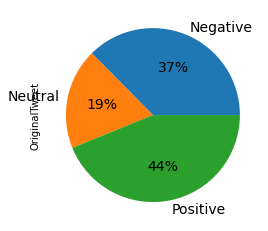

In [139]:
# Chart - 1 visualization code
data.groupby('Sentiment')['OriginalTweet'].count().plot(kind = 'pie', autopct='%.0f%%', textprops={'fontsize': 14})

##### 1. Why did you pick the specific chart?

##### 1. We picked this pie chart to plot the relationship between Sentiment and OriginalTweet

##### 2. Pie charts are useful to represent data that is categorical.

##### 2. What is/are the insight(s) found from the chart?

##### **As we can see from the above visual that 44% tweets are positive, 37% are negative and 19% tweets are neutral. There are good number of positive tweets that shows positive mindset of people during the pandemic.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

##### **As the sentiment of many tweets are positive so business can look forward to run ads related to more positive content, so that the click-through rates will increase and also the revenue.**

#### Chart - 2

Text(0.5, 1.0, 'Number of Sentences and Sentiment Relation')

<Figure size 720x360 with 0 Axes>

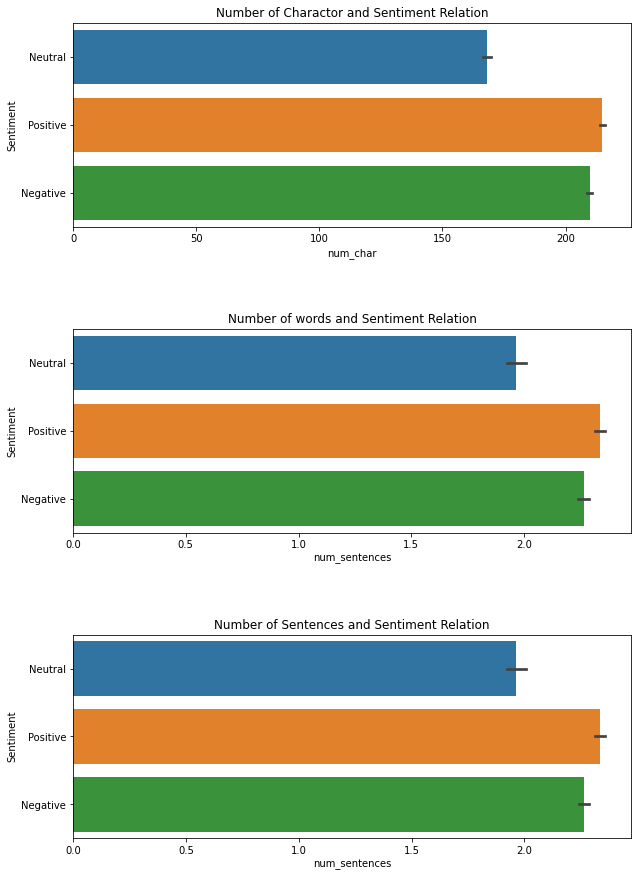

In [140]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,15)) 
ax = axes.flatten()
sns.barplot(data=data, x='num_char', y='Sentiment', ax=ax[0])
plt.subplots_adjust(hspace=0.5, wspace=0.2)
sns.barplot(data=data, x='num_sentences', y='Sentiment', ax=ax[1])
sns.barplot(data=data, x='num_sentences', y='Sentiment', ax=ax[2])
ax[0].set_title('Number of Charactor and Sentiment Relation')
ax[1].set_title('Number of words and Sentiment Relation')
ax[2].set_title('Number of Sentences and Sentiment Relation')

##### 1. Why did you pick the specific chart?

##### 1. We Picked this specific chart to plot the relation between character count of tweets and sentiments, word count of tweets and sentiment, and sentence count of tweets and sentiment.
##### 2. We used this specific chart because bar plot is a graph that represents the distribution of a categorical or discrete dataset.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that number of words, number of sentences and number of characters has no such drastic effects on sentiment.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It can be seen that number of words, number of sentences and number of characters has no such drastic effects on sentiment, so there will be no impact upon the business because of this.

#### Chart - 3

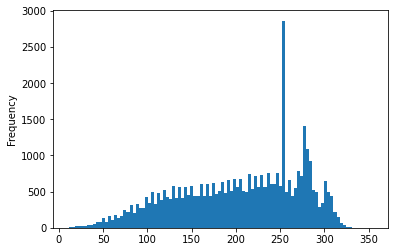

In [141]:
# Chart - 3 visualization code
data['num_char'].plot(bins=100, kind='hist')

In [142]:
data['num_char'].describe()

count    41157.000000
mean       204.200160
std         68.655129
min         11.000000
25%        151.000000
50%        215.000000
75%        259.000000
max        355.000000
Name: num_char, dtype: float64

In [143]:
data[data['num_char'] == 11]

UserName  ScreenName                  Location    TweetAt  \
9776      13575       58527  Scotland, United Kingdom 2020-03-20   
16872     20671       65623                      ?? ? 2020-03-23   
20467     24266       69218           Coastal Elite ? 2020-03-25   
35526     39325       84277             Indore, India 2020-09-04   

      OriginalTweet Sentiment  num_char  num_words  num_sentences  
9776    Be like Bob  Positive        11          3              1  
16872   Cartoon for   Neutral        11          2              1  
20467   Omg y all     Neutral        11          3              1  
35526         amp     Neutral        11          1              1

In [144]:
data[data['num_char'] == 355]

UserName  ScreenName              Location    TweetAt  \
25160     28959       73911  Melbourne, Australia 2020-03-30   

                                           OriginalTweet Sentiment  num_char  \
25160  Crude oil dropped to its lowest in 17 years in...  Negative       355   

       num_words  num_sentences  
25160         57              2

In [145]:
data[data['num_char'] == 355]['OriginalTweet'].iloc[0]

'Crude oil dropped to its lowest in 17 years in Asia as #coronavirus in #US and #EU shows little sign of slowing.\r\r\n\r\r\nNoon prices:\r\r\n#SPX500Â\x962504.3\r\r\n#NAS100Â\x967507.1\r\r\n#WTIÂ\x9620.24\r\r\n#GOLDÂ\x961618.08\r\r\n#SILVERÂ\x9614.118\r\r\n\r\r\nWatch these prices closely: https://t.co/WuiEEfSNOj\r\r\n\r\r\n#COVID19 #CoronaVirusOutbreak https://t.co/j68MZIDXAd https://t.co/9MyqGxutUU'

In [146]:
data[data['num_char'] == 280]

UserName  ScreenName                        Location    TweetAt  \
8          3807       48759                 Atlanta, GA USA 2020-03-16   
27         3826       48778             Everywhere You Are! 2020-03-16   
53         3852       48804                             NaN 2020-03-16   
374        4173       49125            East Central Alberta 2020-03-16   
408        4207       49159                       Wayne, NJ 2020-03-16   
...         ...         ...                             ...        ...   
40999     44798       89750                   United States 2020-04-14   
41018     44817       89769  https://ivotoniut.blogspot.com 2020-04-14   
41027     44826       89778            Toronto, ONT, Canada 2020-04-14   
41032     44831       89783                     Connecticut 2020-04-14   
41096     44895       89847                     Hawaii, USA 2020-04-14   

                                           OriginalTweet Sentiment  num_char  \
8      Due to COVID-19 our retail store and classroom...  Positive       280   
27     This morning I tested positive for Covid 19. I...  Negative       280   
53     Dear Coronavirus, \r\r\nI've been following so...  Positive       280   
374    #NewZealand beef exports to U.S. and Canada ar...  Positive       280   
408    Anyone who suspects price gouging and other CO...  Negative       280   
...                                                  ...       ...       ...   
40999  Company Withdraws Fiscal 2020 Financial Guidan...  Positive       280   
41018  In #Italy the composition has always been indi...  Negative       280   
41027  this deck by .@lukew in insanely good - great ...  Positive       280   
41032  Thank you to all our health care workers , doc...  Positive       280   
41096  A grocery store manager shared their 20-point ...  Positive       280   

       num_words  num_sentences  
8             52              4  
27            61              6  
53            52              5  
374           53              5  
408           48              2  
...          ...            ...  
40999         59              1  
41018         60              4  
41027         52              5  
41032         53              3  
41096         40              1  

[461 rows x 9 columns]

##### 1. Why did you pick the specific chart?

We used this specific chart to check plot the histogram for our length of the tweets, and to check the average, maximum and minimum length of tweets in the dataset

##### 2. What is/are the insight(s) found from the chart?



*   The length of the shortest tweet is 11
*   The length of the longest tweet is 355, and it is from Melbourne, Australia. The Sentiment of this tweet is negative
*   The average length of tweets that is number of characters lies between 250-300.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These length of tweets can help the business in spam classification also

#### Chart - 4

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



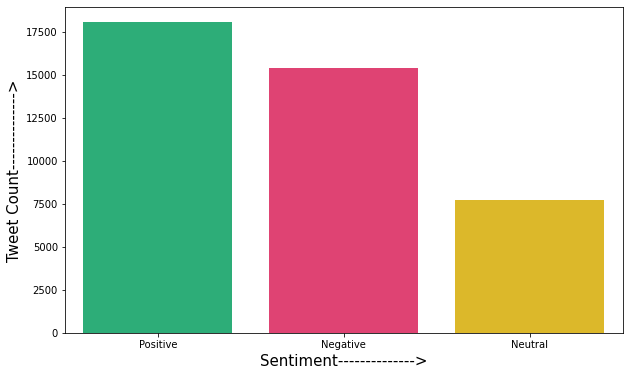

In [147]:
# Chart - 4 visualization code
# ploting countplot for "Sentiment" column
plt.figure(figsize=(10,6))
sns.countplot('Sentiment',data=data,order=data.Sentiment.value_counts().index,palette = ['#17C37B','#F92969','#FACA0C'])
plt.xlabel("Sentiment-------------->", fontsize=15)
plt.ylabel("Tweet Count-------------->", fontsize=15)
plt.xticks()
plt.show()

In [148]:
no_of_pos_tweets = len(data[data['Sentiment'] == 'Positive'])
no_of_neg_tweets = len(data[data['Sentiment'] == 'Negative'])
no_of_neutral_tweets = len(data[data['Sentiment'] == 'Neutral'])

In [149]:
count_dic = {'Sentiments':['Positive', 'Negative', 'Neutral'], 'Count':[no_of_pos_tweets, no_of_neg_tweets, no_of_neutral_tweets]}

In [150]:
count_df = pd.DataFrame(count_dic)

In [151]:
count_df

Sentiments  Count
0   Positive  18046
1   Negative  15398
2    Neutral   7713

##### 1. Why did you pick the specific chart?

* To Plot the countplot between difeerent classes in Setiment column.
* To check out the number of Tweets and sentiment relation.

##### 2. What is/are the insight(s) found from the chart?

* We have 18,046 Tweets of Positive Sentiment.
* We have 15,398 tweets of Negative Sentiment.
* We have 7,713 Tweets of Neutral Sentiment.
* Tweets with positve sentiments are the highest in number.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As there are more number of positive tweets, negative tweets are not less in number. So, company may try to run some social campaign that is based on spreading the positivity throughout the community, which will benefit the company as it'll increase the loyalty and trust of users in the company.

#### Chart - 5

In [152]:
# Chart - 5 visualization code
# Barplot for hashtags

import re 
def find_hash(OriginalTweet):
    line=re.findall(r'(?<=#)\w+',OriginalTweet)
    return " ".join(line)
data['hash']=data['OriginalTweet'].apply(lambda x:find_hash(x))
temp=data['hash'].value_counts()[:][1:6]
temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
temp

## The above function find_ash use the regular expression module i.e. re. The function uses the re (regular expression) module to search for hashtags in the input string. The findall function of the re module is used to find all the hashtags in the string. The findall function takes a regular expression pattern as an argument and returns a list of all the matches.
## The regular expression pattern r'(?<=#)\w+' is used to match hashtags. The \w+ part of the pattern matches one or more alphanumeric characters (a-z, A-Z, 0-9). The (?<=#) part of the pattern specifies that the match should be preceded by a "#" symbol. This ensures that only words that start with "#" are matched as hashtags.

## Finally, the join function is used to join the list of hashtags into a single string, with a space character between each hashtag. This resulting string is returned by the function.

Hashtag  count
0          coronavirus   2670
1             Covid_19    652
2          Coronavirus    541
3            COVID2019    415
4  coronavirus COVID19    215

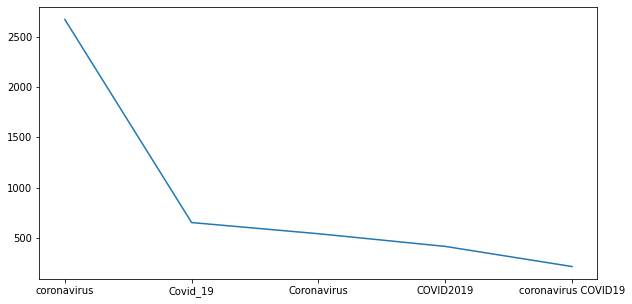

In [153]:
fig = plt.figure(figsize=(10, 5))
plt.plot(temp["Hashtag"],temp["count"])     

##### 1. Why did you pick the specific chart?

We have used this plot to plot the graph for different hashtags used in tweets and to check their frequency.

##### 2. What is/are the insight(s) found from the chart?

* coronavirus Hashtag is the most used hashtag in the tweets that are given in our dataset.
* It has been used 2670 times by different users in their tweets.
* Other popular hashtags are Covid_19 with frequency 652, Coronavirus with frequency 541, COVID2019 with frequency 415, and the last one that is coronavirus COVID19 with frequency 215

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can use this insight to keep a check on what's trending and why is it in the trend, so that it could help in posting targeted ads and relatable campaigns throughout the platform.

#### Chart - 6

In [154]:
# Chart - 6 visualization code
import re 
def find_hash(OriginalTweet):
    line=re.findall(r'(?<=@)\w+',OriginalTweet)
    return " ".join(line)
data['tags']=data['OriginalTweet'].apply(lambda x:find_hash(x))
temp=data['tags'].value_counts()[:][1:11]
temp= temp.to_frame().reset_index().rename(columns={'index':'Tag','tags':'count'})
temp

Tag  count
0  realDonaldTrump    125
1          YouTube     74
2     BorisJohnson     62
3            Tesco     61
4           amazon     59
5              FTC     45
6       sainsburys     41
7         McKinsey     33
8      piersmorgan     33
9     narendramodi     31

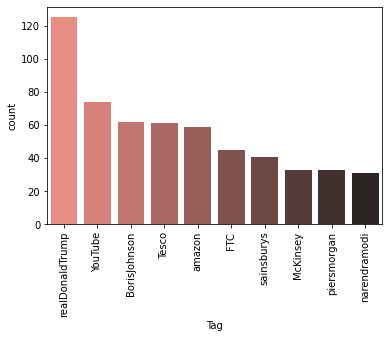

In [155]:
plt.xticks(rotation=90)
sns.barplot(x="Tag",y="count", data = temp,palette="dark:salmon_r")

##### 1. Why did you pick the specific chart?

Here we have used barplot to check the plot of different tags used by people in their tweets, which accounts were mostly tagged by people across the comminity.

##### 2. What is/are the insight(s) found from the chart?

realDonaldTrump is the tag that's been mostly used by people across the world. DonalTrump is ex-president of America, and that's why people had tagged him the most in order to tell the severity of situations in different areas.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this company can find out the most famous and trending celebrities on their platform.

#### Chart - 7

In [156]:
data.head()

UserName  ScreenName   Location    TweetAt  \
0      3799       48751     London 2020-03-16   
1      3800       48752         UK 2020-03-16   
2      3801       48753  Vagabonds 2020-03-16   
3      3802       48754        NaN 2020-03-16   
4      3803       48755        NaN 2020-03-16   

                                       OriginalTweet Sentiment  num_char  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral       111   
1  advice Talk to your neighbours family to excha...  Positive       237   
2  Coronavirus Australia: Woolworths to give elde...  Positive       131   
3  My food stock is not the only one which is emp...  Positive       306   
4  Me, ready to go at supermarket during the #COV...  Negative       310   

   num_words  num_sentences  \
0         17              1   
1         38              1   
2         18              1   
3         58              4   
4         58              4   

                                                hash  \
0                                                      
1                                                      
2                                                      
3  COVID19france COVID_19 COVID19 coronavirus con...   
4  COVID19 coronavirus CoronavirusFrance restezch...   

                           tags  
0  MeNyrbie Phil_Gahan Chrisitv  
1                                
2                                
3                                
4

In [157]:
data['Location'].fillna('', inplace = True)

In [158]:
x = data.copy()

In [159]:
x.rename(columns = {'Sentiment':'Tweet Count'}, inplace = True)

In [160]:
# Chart - 7 visualization code
world_plot = x.groupby(['Location'], as_index=False).count()

In [161]:
import plotly.express as px

In [162]:
fig = px.choropleth(world_plot, locations='Location', locationmode='country names', 
                    color='Tweet Count', hover_name= 'Location', projection='orthographic')

In [163]:
fig.show()

In [164]:
data['Location'].nunique()

12221

In [165]:
data.shape

(41157, 11)

In [166]:
data[data['Location'] == 'Kinshasa']

UserName  ScreenName  Location    TweetAt  \
20381     24180       69132  Kinshasa 2020-03-25   

                                           OriginalTweet Sentiment  num_char  \
20381  She does not have a face mask to wear amp has ...  Positive       217   

       num_words  num_sentences hash tags  
20381         44              1

In [167]:
data[data['Location'] == 'Alberton, South Africa']

UserName  ScreenName                Location    TweetAt  \
40360     44159       89111  Alberton, South Africa 2020-04-13   

                                           OriginalTweet Sentiment  num_char  \
40360  @HeidiGiokos @flysaa So disturbing that SA is ...  Positive       255   

       num_words  num_sentences hash                tags  
40360         45              3       HeidiGiokos flysaa

In [168]:
data[data['Location'] == 'Namibia']

UserName  ScreenName Location    TweetAt  \
21105     24904       69856  Namibia 2020-03-25   
21301     25100       70052  Namibia 2020-03-25   
24635     28434       73386  Namibia 2020-03-27   
29979     33778       78730  Namibia 2020-06-04   
29980     33779       78731  Namibia 2020-06-04   

                                           OriginalTweet Sentiment  num_char  \
21105  Providers of healthcare and hygiene products i...  Negative       227   
21301  Mara this fools keep on suprising me. They wan...  Negative       238   
24635  Even during DStv is just increasing their pric...  Negative        64   
29979  Food Security The current demand is high even ...  Positive       260   
29980  Our priority Number 1: is Airport or Food Secu...  Positive        72   

       num_words  num_sentences hash tags  
21105         34              1            
21301         45              4            
24635         10              1            
29979         43              1            
29980         14              2

##### 1. Why did you pick the specific chart?

* We used this chart to plot the relation between number of tweets and the location of the users who posted those tweets
* We have applied groupby on location to get the specific data to plot this chloropeth map.


##### 2. What is/are the insight(s) found from the chart?

Our number of tweets data is quite distributed across different locations, like In kinshasha and Alberton there are only 1 number of tweets while there are 5 tweets posted from Namibia 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company may learn which are the most active locations from where tweets are being posted by using this graphic and its insights. And can go on to develop more focused revenue-generating marketing strategies.

#### Chart - 8

In [169]:
# Chart - 8 visualization code
wc = WordCloud(width=700,height=600,min_font_size=10,background_color='white')


In [170]:
data[data['Sentiment'] == 'Positive']['OriginalTweet']

1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
5        As news of the regionÂs first confirmed COVID...
6        Cashier at grocery store was sharing his insig...
                               ...                        
41146    #Gold prices rose to a more than 7-year high t...
41148    UV light Sterilizer Sanitizer for your mask an...
41150    I never that weÂd be in a situation &amp; wor...
41151    @MrSilverScott you are definitely my man. I fe...
41154    You know itÂs getting tough when @KameronWild...
Name: OriginalTweet, Length: 18046, dtype: object

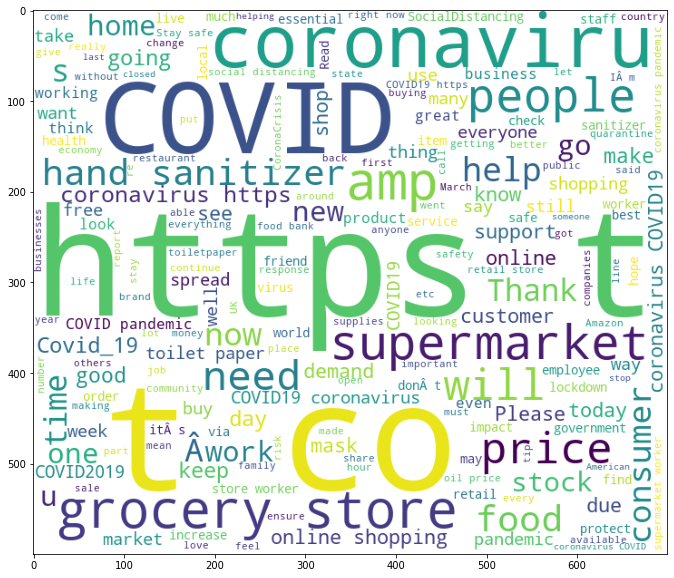

In [171]:
#wordcloud for Positive Sentiment
positive_tweet = wc.generate(data[data['Sentiment'] == 'Positive']['OriginalTweet'].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(positive_tweet)

##### 1. Why did you pick the specific chart?

Wordcloud shows the popularity of words or phrases by making the most frequently used words appear larger or bolder compared with the other words around them.

##### 2. What is/are the insight(s) found from the chart?

Here as we can see the word cloud broke the text down into component words and counting how frequently they appear in the body of text. And here it shows us what are the majority of the positive words used in the tweet

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Word clouds are an essential visual aid to highlight keywords that your business is focusing on. They offer a visible picture of text data and let you pick up on important words that customers might be using to describe you or how employees perceive the business.

#### Chart - 9

In [172]:
# Chart - 9 visualization code
data[data['Sentiment'] == 'Negative']['OriginalTweet']

4        Me, ready to go at supermarket during the #COV...
9        For corona prevention,we should stop to buy th...
20       with 100  nations inficted with  covid  19  th...
24       @10DowningStreet @grantshapps what is being do...
26       In preparation for higher demand and a potenti...
                               ...                        
41133    A Singaporean politician who slammed a woman s...
41147    YÂall really shitting that much more at home?...
41149    Still shocked by the number of #Toronto superm...
41153    Response to complaint not provided citing COVI...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 15398, dtype: object

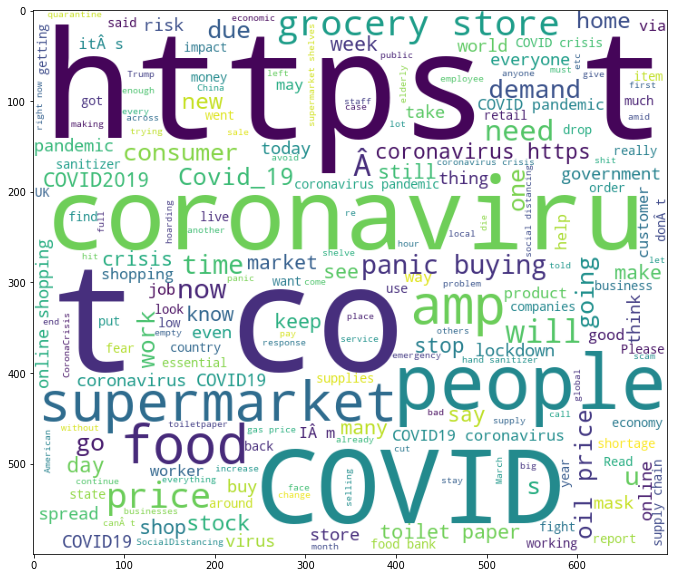

In [173]:

negative_tweet = wc.generate(data[data['Sentiment'] == 'Negative']['OriginalTweet'].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(negative_tweet)

##### 1. Why did you pick the specific chart?

Wordcloud shows the popularity of words or phrases by making the most frequently used words appear larger or bolder compared with the other words around them.

##### 2. What is/are the insight(s) found from the chart?

And here it shows us what are the majority of the negative tweeted words appeared in the pandemic data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Word clouds are an essential visual aid to highlight keywords that your business is focusing on. They offer a visible picture of text data and let you pick up on important words that customers might be using to describe you or how employees perceive the business.

#### Chart - 10

In [174]:
# Chart - 10 visualization code
data[data['Sentiment'] == 'Neutral']['OriginalTweet']

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
7        Was at the supermarket today. Didn't buy toile...
10       All month there hasn't been crowding in the su...
16       ????? ????? ????? ????? ??\r\r\n?????? ????? ?...
17       @eyeonthearctic 16MAR20 Russia consumer survei...
                               ...                        
41141    #Coronavirus ?? ????? ??? ????? ?? ??? ???????...
41143    https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUn...
41144    @_Sunrise_SV @Gamzap @NPR What does not having...
41152    Airline pilots offering to stock supermarket s...
41155    Is it wrong that the smell of hand sanitizer i...
Name: OriginalTweet, Length: 7713, dtype: object

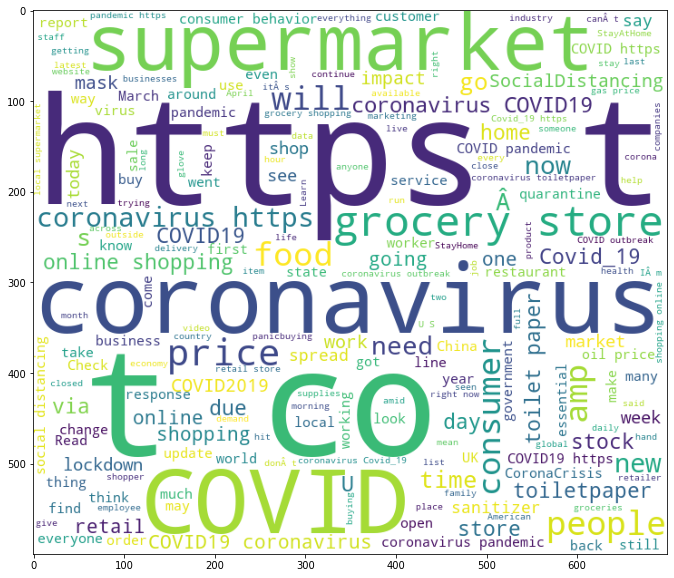

In [175]:

neutral_tweet = wc.generate(data[data['Sentiment'] == 'Neutral']['OriginalTweet'].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(neutral_tweet)

##### 1. Why did you pick the specific chart?

Wordcloud shows the popularity of words or phrases by making the most frequently used words appear larger or bolder compared with the other words around them.

##### 2. What is/are the insight(s) found from the chart?

And here it shows us what are the majority of the negative tweeted words appeared in the pandemic data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Word clouds are an essential visual aid to highlight keywords that your business is focusing on. They offer a visible picture of text data and let you pick up on important words that customers might be using to describe you or how employees perceive the business.

#### Chart - 11

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5f6c34e80>,
      dtype=object)

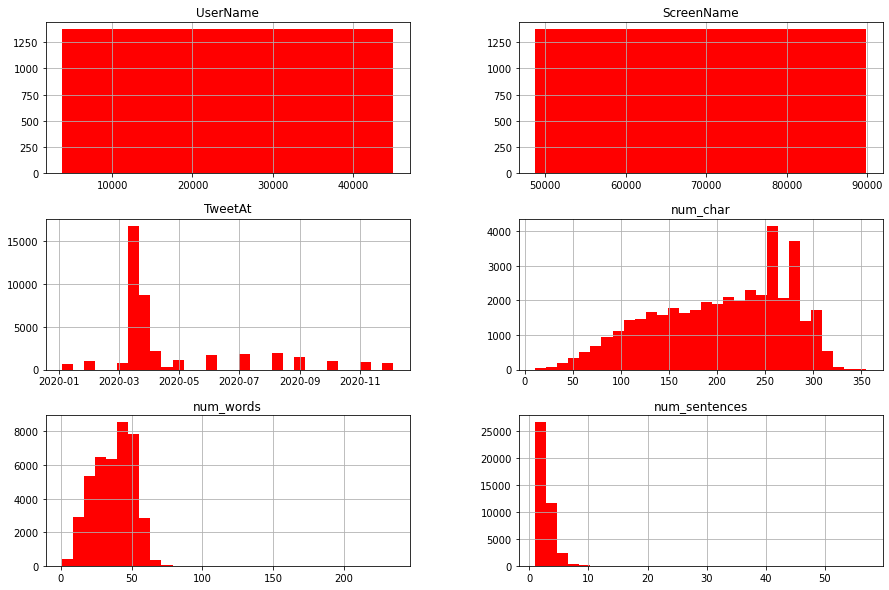

In [176]:
# Chart - 11 visualization code
data.hist(bins=30,figsize=(15,10),color="r")

##### 1. Why did you pick the specific chart?

It is used to summarize data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.

##### 2. What is/are the insight(s) found from the chart?

In the first given data we can see that to every row the user name and screen name are unique so the data is distributed uniformly, and in the TweetAt column we can see the the tweets are high during the 3rd month(March) and 5th(May) month as the first wave of pandemic was spread from the month of March 2020 and there was chaos. Likewise we may see that number of words that are tweeted maximumly between 200-300 with minimum sentences and the words below 50

##### 3. Will the gained insights help creating a positive business impact? 


Yes, it shows Twitter can play a vital role in disseminating time-critical information about the latest case rates and research results—and can do so faster than traditional news media, so it helps the business to give importance to the lastest information and speard the news faster than any media.

#### Chart - 12

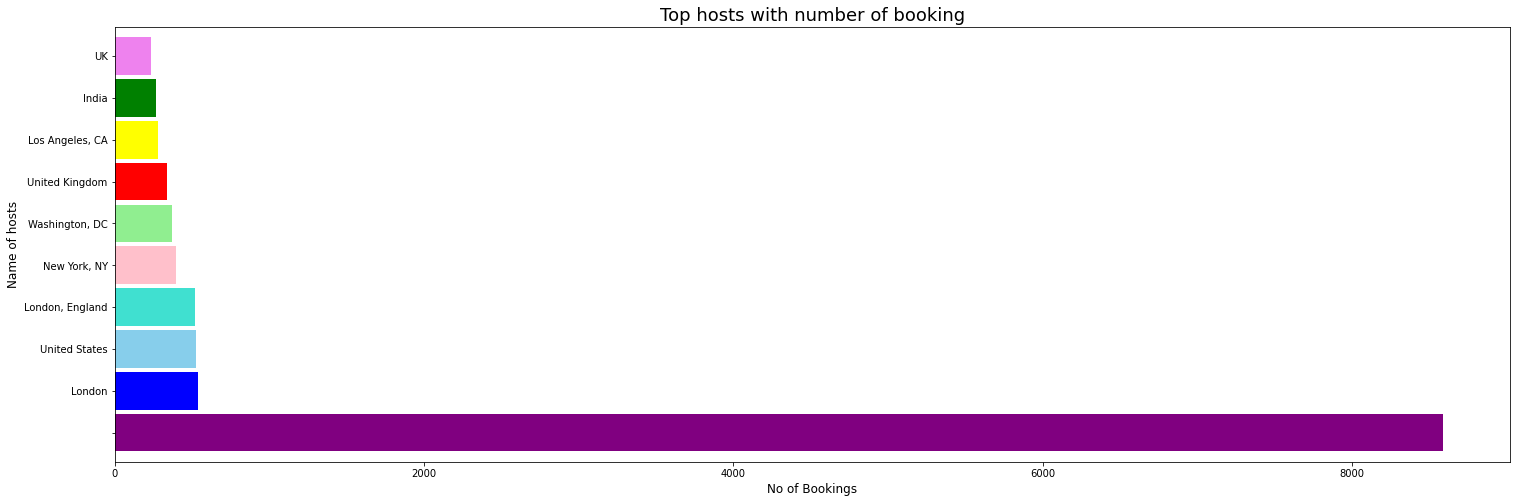

In [177]:
# Chart - 12 visualization code
tweets=data['Location'].value_counts().sort_values(ascending=False)
tweets[:10].plot.barh(figsize=(25, 8), color= ["purple","blue","skyblue","turquoise","pink","lightgreen","red","yellow","green","violet","black"], width=0.9)
plt.title("Top hosts with number of booking", fontsize=18)
plt.xlabel('No of Bookings', fontsize=12)
plt.ylabel('Name of hosts', fontsize=12)
plt.show()


##### 1. Why did you pick the specific chart?

The purpose of a bar graph is to convey relational information quickly in a visual manner. so we used the bar plot such that it displays the value for a particular category of data.

##### 2. What is/are the insight(s) found from the chart?

From the above visual we may see that the tweets made in London ar high followed by United States and England as the cases were increasing rapidly and the news used to spread through twitter fast.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Twitter is mostly based on short, text-based posts, it is perfectly optimised for conveying information, an argument, and many important and authentic information specially during pandemic. Hence, it impacts the business to check the authenticity of the information and to spread the right news across the world as Twitter is handled all over the world. 

#### Chart - 13

In [235]:
Location_df = pd.DataFrame(data.Location.value_counts()).reset_index()

In [237]:
Location_df.rename(columns = {'index' : 'Location', 'Location': 'No. of Tweets'}, inplace = True)

In [240]:
Location_df.iloc[1:31]

Location  No. of Tweets
1                    London            540
2             United States            528
3           London, England            520
4              New York, NY            395
5            Washington, DC            373
6            United Kingdom            337
7           Los Angeles, CA            281
8                     India            268
9                        UK            232
10                Australia            225
11                      USA            223
12                   Canada            191
13  England, United Kingdom            191
14         Toronto, Ontario            160
15                   Global            159
16              Chicago, IL            155
17          California, USA            153
18        San Francisco, CA            152
19               Boston, MA            150
20            New York, USA            140
21         New Delhi, India            138
22              Atlanta, GA            126
23                 New York            126
24            Mumbai, India            109
25                Worldwide            101
26           Lagos, Nigeria             99
27              Houston, TX             98
28               Austin, TX             98
29               Texas, USA             98
30               London, UK             96

Text(0.5, 1.0, 'Top 30 Locations with most of the tweets')

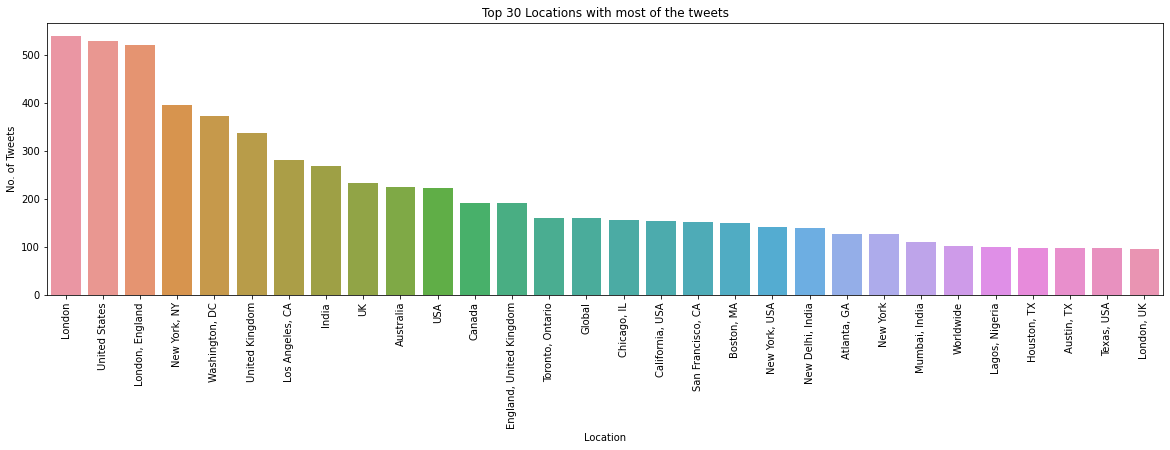

In [241]:
# Visualisation
#barplot of top 30 locations with most of the tweets
plt.figure(figsize=(20,5))
sns.barplot(data=Location_df.iloc[1:31], x='Location', y='No. of Tweets')
plt.xticks(rotation=90)
plt.title('Top 30 Locations with most of the tweets')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

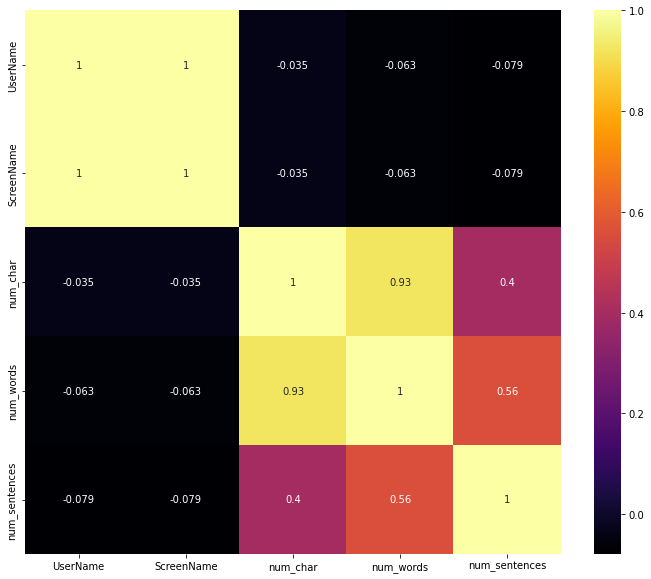

In [179]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot= True, cmap='inferno')

##### 1. Why did you pick the specific chart?

We used heat maps as **Heat Maps** are graphical representations of data that utilize color-coded systems. The primary purpose of Heat Maps is to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [242]:
data.head()

UserName  ScreenName   Location    TweetAt  \
0      3799       48751     London 2020-03-16   
1      3800       48752         UK 2020-03-16   
2      3801       48753  Vagabonds 2020-03-16   
3      3802       48754            2020-03-16   
4      3803       48755            2020-03-16   

                                       OriginalTweet Sentiment  num_char  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral       111   
1  advice Talk to your neighbours family to excha...  Positive       237   
2  Coronavirus Australia: Woolworths to give elde...  Positive       131   
3  My food stock is not the only one which is emp...  Positive       306   
4  Me, ready to go at supermarket during the #COV...  Negative       310   

   num_words  num_sentences  \
0         17              1   
1         38              1   
2         18              1   
3         58              4   
4         58              4   

                                                hash  \
0                                                      
1                                                      
2                                                      
3  COVID19france COVID_19 COVID19 coronavirus con...   
4  COVID19 coronavirus CoronavirusFrance restezch...   

                           tags  Negative  Neutral  Positive  
0  MeNyrbie Phil_Gahan Chrisitv         0        1         0  
1                                       0        0         1  
2                                       0        0         1  
3                                       0        0         1  
4                                       1        0         0

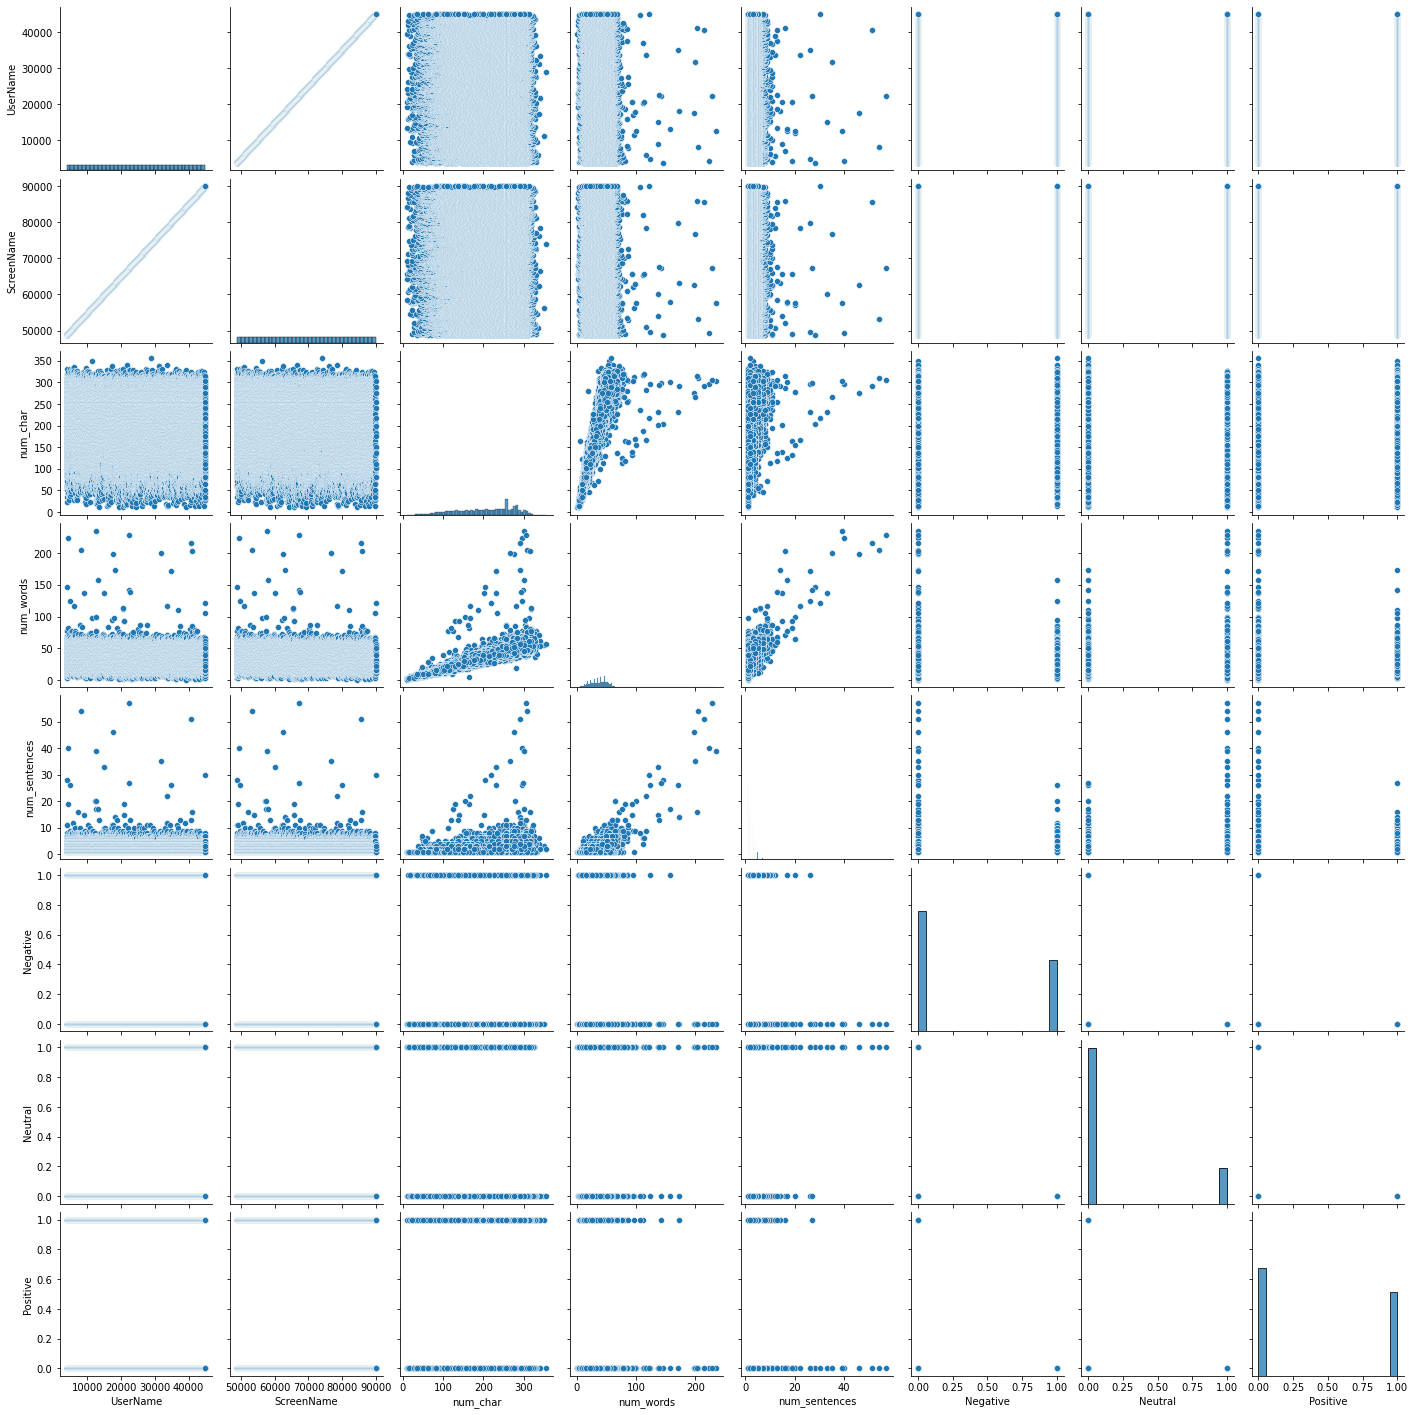

In [246]:
# Pair Plot visualization code
sns.pairplot(data)

##### 1. Why did you pick the specific chart?

We used Pair plot as it is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [181]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [182]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [183]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [184]:
data.sample(10)

UserName  ScreenName                        Location    TweetAt  \
40494     44293       89245  United States Minor Outlying I 2020-04-13   
23371     27170       72122                      Queens, NY 2020-03-26   
2248       6047       50999                         Toronto 2020-03-17   
35586     39385       84337        ÃT: 54.975455,-1.595362 2020-09-04   
41011     44810       89762                         Indiana 2020-04-14   
39032     42831       87783                      Hmu hunks  2020-12-04   
37883     41682       86634                Portland, Oregon 2020-11-04   
31049     34848       79800                                 2020-06-04   
39315     43114       88066      Johannesburg, South Africa 2020-12-04   
37757     41556       86508                                 2020-11-04   

                                           OriginalTweet Sentiment  num_char  \
40494  Who tryna host this tape its done i need them ...   Neutral        53   
23371  Gas prices have seem to not have taken any hit...  Positive       249   
2248   From @nielsen Consumer Buying Behaviours durin...   Neutral       135   
35586  Starbucks launches first of its kind Global Pa...  Positive       169   
41011  Arm yourself with current information about CO...  Negative       276   
39032  POV: you r shopping at ur local supermarket an...  Positive       206   
37883  We usually rescue about 12 million pounds of f...  Positive       234   
31049  Covid -19 thought us a lots about life ,but ma...  Positive       209   
39315  @RealRonnieRay Respect your take, so basically...  Positive       255   
37757         Please be careful. https://t.co/qy24Id1vuQ  Positive        42   

       num_words  num_sentences                                    hash  \
40494         11              1                                           
23371         51              5                                           
2248          17              1  Coronavirustoronto PreventionOverPanic   
35586         25              1                                           
41011         45              3                                           
39032         37              2                    coronavirus DragRace   
37883         42              1                                           
31049         47              1                                           
39315         46              1                                           
37757          7              2                                           

                tags  
40494                 
23371                 
2248         nielsen  
35586                 
41011                 
39032  CrystalMethyd  
37883                 
31049                 
39315  RealRonnieRay  
37757

In [185]:
# Handling Missing Values & Missing Value Imputation
data.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
num_char         0
num_words        0
num_sentences    0
hash             0
tags             0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [186]:
# Handling Outliers & Outlier treatments


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [187]:
# Encode your categorical columns
sentiment = pd.get_dummies(data['Sentiment'])
sentiment

Negative  Neutral  Positive
0             0        1         0
1             0        0         1
2             0        0         1
3             0        0         1
4             1        0         0
...         ...      ...       ...
41152         0        1         0
41153         1        0         0
41154         0        0         1
41155         0        1         0
41156         1        0         0

[41157 rows x 3 columns]

In [188]:
data = pd.concat([data,sentiment],axis=1)
data.head()

UserName  ScreenName   Location    TweetAt  \
0      3799       48751     London 2020-03-16   
1      3800       48752         UK 2020-03-16   
2      3801       48753  Vagabonds 2020-03-16   
3      3802       48754            2020-03-16   
4      3803       48755            2020-03-16   

                                       OriginalTweet Sentiment  num_char  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral       111   
1  advice Talk to your neighbours family to excha...  Positive       237   
2  Coronavirus Australia: Woolworths to give elde...  Positive       131   
3  My food stock is not the only one which is emp...  Positive       306   
4  Me, ready to go at supermarket during the #COV...  Negative       310   

   num_words  num_sentences  \
0         17              1   
1         38              1   
2         18              1   
3         58              4   
4         58              4   

                                                hash  \
0                                                      
1                                                      
2                                                      
3  COVID19france COVID_19 COVID19 coronavirus con...   
4  COVID19 coronavirus CoronavirusFrance restezch...   

                           tags  Negative  Neutral  Positive  
0  MeNyrbie Phil_Gahan Chrisitv         0        1         0  
1                                       0        0         1  
2                                       0        0         1  
3                                       0        0         1  
4                                       1        0         0

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [189]:
# Expand Contraction
#data['OriginalTweet'].sample(10)

In [190]:
#!pip install contractions

In [191]:
#import contractions

In [192]:
#contractions.fix(data['OriginalTweet'])

#### 2. Lower Casing

In [193]:
# Lower Casing

#### 3. Removing Punctuations

In [194]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [195]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [196]:
# Remove Stopwords

In [197]:
# Remove White spaces

#### 6. Rephrase Text

In [198]:
# Rephrase Text

#### 7. Tokenization

In [199]:
# Tokenization

#### 8. Text Normalization

In [200]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [201]:
# POS Taging

#### 10. Text Vectorization

In [202]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [203]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [204]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [205]:
# Transform Your data

### 6. Data Scaling

In [206]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [207]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [208]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [209]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [210]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [211]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [212]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [213]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [214]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [215]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [216]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [217]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [218]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [219]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

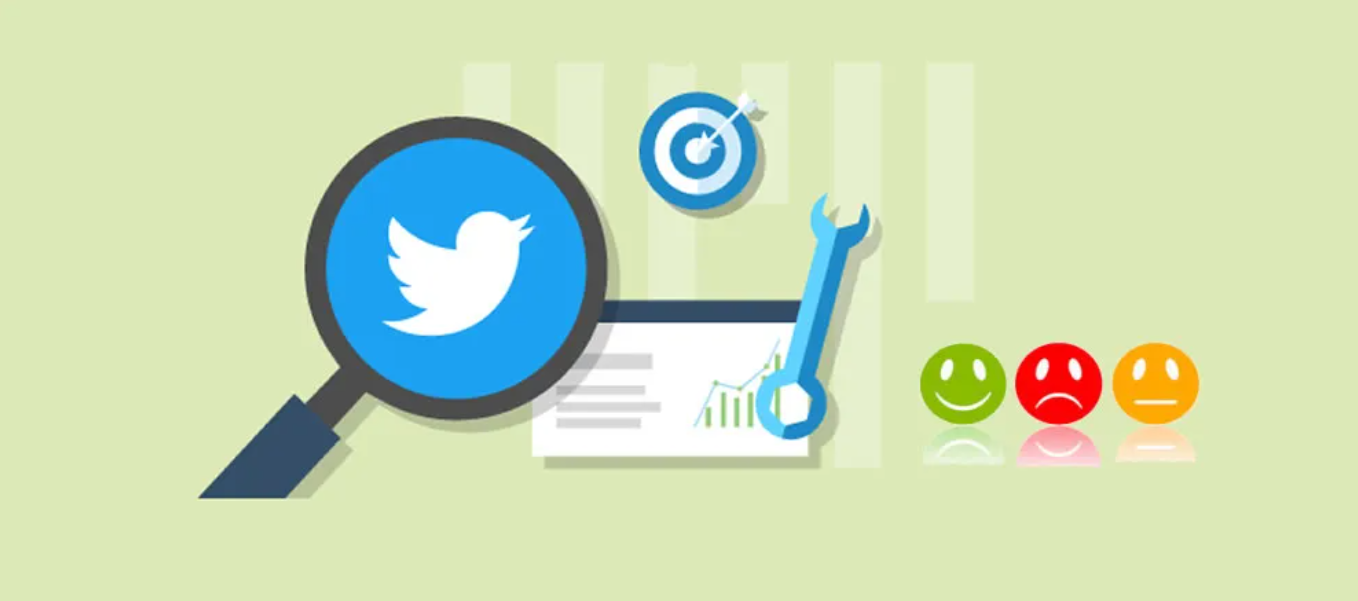

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***